#### K-Means Clustering

In [499]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA , KernelPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import optuna
from sklearn.model_selection import train_test_split

In [500]:
dict={'model':['SoftmaxRegressionModel','RandomForestClassifier','XGBClassifier'],
      'accuracy_score_train':[],
      'accuracy_score_test':[],
      'f1_score_train':[]}

In [501]:
# Noramlization
Numerical_features=[ 'Age','Height','Weight' ,'FCVC' ,'NCP' ,'CH2O' ,'FAF' , 'TUE' ]

In [502]:
import pandas as pd

`🧰 ColumnTransformer with MinMaxScaler — Explanation `

The `ColumnTransformer` in Scikit-learn allows you to apply different preprocessing techniques to specific columns of your dataset. This is especially useful when you have a mix of numerical, categorical, and binary features.

`🧾 ColumnTransformer Component Breakdown`

| **Component**               | **Purpose**                                                                     |
|-----------------------------|----------------------------------------------------------------------------------|
| `'Normalization'`           | Just a **name** for this transformation step (can be anything)                  |
| `MinMaxScaler()`            | Applies **Min-Max scaling** to selected columns (scales values to 0–1 range)   |
| `NumericalFeatures`         | List of **column names or indices** that are numeric and should be scaled       |
| `remainder='passthrough'`   | Tells it to **leave the rest of the columns unchanged**                         |



In [503]:
''' When we have a mix of numerical features and categorical features we use this just to normalize only the numerical features ''' 
PreprocessingFeatures = ColumnTransformer(
    [
        ('Normalization', MinMaxScaler(), Numerical_features)
    ],
    remainder='passthrough',n_jobs=2
)


`⚙️ Pipeline in Scikit-learn`

When building machine learning models in Scikit-learn, you can either manually preprocess your data and train the model, or use a `Pipeline` to automate and streamline the process.

In [504]:
pca=PCA(0.99,random_state=30)

ClusteringAnalysis = Pipeline(
    [
        ('Preprocessing',PreprocessingFeatures), #0
        ('DimensionalReduction',pca),            #1
        ('Clustering',KMeans(n_clusters=4,random_state=30)), #2
    ] 
)

 

In [505]:
df=pd.read_csv('ObesityDataSet_Cleaned.csv')

In [506]:
LabelsClusters = ClusteringAnalysis.fit_predict(df)

In [507]:
pca.explained_variance_ratio_.sum()
# this value closed to one means the new principle components represent the old dataset with old features well

0.9999294424826446

In [508]:
TransformedDataset = ClusteringAnalysis[:2].transform(df) # here we only do the preprocesssing and dimensionality reduction

In [509]:
TransformedDataset.shape #here we see we have 7 principle components

(2111, 1)

In [510]:
_score = silhouette_score(TransformedDataset,LabelsClusters)
print(f'Silhouette Score :: {_score:.4f}')

Silhouette Score :: 0.5710


`📊 What is the Silhouette Score?`

The **Silhouette Score** measures how similar a data point is to **its own cluster** compared to **other clusters**.

It tells you how well each point fits into its assigned cluster.

---

`📐 Formula Intuition:`

For each data point:

- Let **a** = average distance to all other points in the **same cluster** (intra-cluster distance)
- Let **b** = average distance to all points in the **nearest other cluster** (nearest-cluster distance)

Then the **Silhouette Score** is computed as:

\[
\text{Silhouette Score} = \frac{b - a}{\max(a, b)}
\]

---

`🧠 What Do the Values Mean?`

| **Silhouette Score**       | **Interpretation**                                                 |
|----------------------------|---------------------------------------------------------------------|
| **+1.0 (close to 1)**       | Perfectly matched to its own cluster, far from other clusters       |
| **0**                      | On or very close to the boundary between two clusters               |
| **-1.0 (close to -1)**      | Likely assigned to the wrong cluster                                |


A **higher silhouette score** indicates better-defined and more clearly separated clusters.


#### Preprocesising Pipeline

here we will use the StandardScaler library here for noramization

In [511]:
from sklearn.preprocessing import StandardScaler

In [512]:
# these are the features that we are going to use for normalization
df[Numerical_features] 

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


In [513]:
df_copy=df.copy()
df_copy.head()
df_copy=df_copy.drop(columns=['NObeyesdad'],axis=1)
df.head()


,Unnamed: 0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,BMI,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1,24.386526,0,0,0,1,0
1,1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,24.238227,0,0,0,1,0
2,2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1,23.765432,0,0,0,1,0
3,3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,5,26.851852,0,0,0,0,1
4,4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,6,28.342381,0,0,0,1,0


In [514]:
X_train, X_test, y_train, y_test = train_test_split(df_copy,df['NObeyesdad'],test_size=0.2,random_state=30)

In [515]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [516]:
PreprocessingFeatures = ColumnTransformer(
    [
        ('Normalization', StandardScaler(), Numerical_features)
    ],
    remainder='passthrough')

In [517]:
PreprocessingFeatures

ColumnTransformer(remainder='passthrough',
                  transformers=[('Normalization', StandardScaler(),
                                 ['Age', 'Height', 'Weight', 'FCVC', 'NCP',
                                  'CH2O', 'FAF', 'TUE'])])

### Softmax Regression

In [518]:
from sklearn.linear_model import LogisticRegression

In [519]:
def objective(trial):
    # Suggest hyperparameters
    C = trial.suggest_float('SoftmaxRegressionModel__C',1,10,log=True) #considering float values between 1e-10 and 2 
    #use log=True for logarithmic scale
    l1_ratio=trial.suggest_float('SoftmaxRegressionModel__l1_ratio',0,1) #considering float values between 0 and 1
    
    # Create pipeline
    pipeline = Pipeline([
        ('Preprocessing',PreprocessingFeatures),
        ('SoftmaxRegressionModel', LogisticRegression(
            penalty='elasticnet',
            solver='saga',
            random_state=40,
            l1_ratio=l1_ratio,
            C=C,
            max_iter=1000
            ))
    ])

    # Cross-validate
    score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='accuracy')
    return score.mean()
    #optuna tries to maximize the accuracy score
    # we can also use other scoring metrics like f1, precision, recall, roc_auc
    

In [ ]:
study_1 = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=30))
study_1.optimize(objective, n_trials=15)

[I 2025-08-03 09:55:42,219] A new study created in memory with name: no-name-a1a22bb5-ea95-4fd5-a15c-0e03a4866ec1
c:\Users\singer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\singer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\singer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2025-08-03 09:55:45,633] Trial 0 finished with value: 0.3341213504168694 and parameters: {'SoftmaxRegressionModel__C': 4.407004927203142, 'SoftmaxRegressionModel__l1_ratio': 0.38074848963511654}. Best is trial 0 with value: 0.3341213504168694.
c:\Users\singer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The 

In [ ]:
print("Best params:", study_1.best_trial.params)
print("Best score:", study_1.best_trial.value)

Best params: {'SoftmaxRegressionModel__C': 4.407004927203142, 'SoftmaxRegressionModel__l1_ratio': 0.38074848963511654}
Best score: 0.3341213504168694


In [522]:
from sklearn.metrics import accuracy_score

In [523]:
best_params = study.best_trial.params

In [524]:
best_params

{'SoftmaxRegressionModel__C': 4.407004927203142,
 'SoftmaxRegressionModel__l1_ratio': 0.38074848963511654}

In [525]:

# Rebuild pipeline with best params
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('LogisticRegressionModel', LogisticRegression(
        C=best_params['SoftmaxRegressionModel__C'],
        l1_ratio=best_params['SoftmaxRegressionModel__l1_ratio'],
        penalty='elasticnet',
        solver='saga',
        random_state=30
    ))
])

# Fit the full pipeline on all training data
best_pipeline.fit(X_train, y_train)

y_pred_test = best_pipeline.predict(X_test)
y_pred_train = best_pipeline.predict(X_train)
test_score=accuracy_score(y_test, y_pred_test)
train_score=accuracy_score(y_train, y_pred_train)
print(f" test accuracy score: {test_score:.4f} and train accuracy score: {train_score:.4f}")



 test accuracy score: 0.8936 and train accuracy score: 0.9295


c:\Users\singer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [551]:
import joblib

# Save model or pipeline
joblib.dump(best_pipeline, 'SoftMaxRegression.pkl')

['SoftMaxRegression.pkl']

In [526]:
dict.keys()

dict_keys(['model', 'accuracy_score_train', 'accuracy_score_test', 'f1_score_train'])

In [527]:
from sklearn.metrics import f1_score

# here macro means we calculate precision for each class and then take the average
f1 = f1_score(y_test, y_pred_test, average='macro') 

print("f1_score:", f1)

f1_score: 0.8893654939667285


In [528]:
dict['accuracy_score_test'].append(test_score)
dict['accuracy_score_train'].append(train_score)
dict['f1_score_train'].append(f1)

In [529]:
dict

{'model': ['SoftmaxRegressionModel',
  'RandomForestClassifier',
  'XGBClassifier'],
 'accuracy_score_train': [0.9295023696682464],
 'accuracy_score_test': [0.8936170212765957],
 'f1_score_train': [0.8893654939667285]}

### Random Forest Algorithm

In [530]:
from sklearn.ensemble import RandomForestClassifier

In [531]:
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('RandomForestModel__n_estimators',1,100) #considering integer values between 1 and 100 
    max_depth = trial.suggest_int( 'RandomForestModel__max_depth',1,12) 
    criterion=trial.suggest_categorical('RandomForestModel__criterion',['gini','entropy']) #considering float values between 0 and 1
    
    # Create pipeline
    pipeline = Pipeline([
        ('Preprocessing', PreprocessingFeatures),
        ('RandomForestModel', RandomForestClassifier(
            random_state=30,
            n_estimators=n_estimators,
            max_depth=max_depth,
            criterion=criterion,
            n_jobs=-1
            ))
    ])

    # Cross-validate
    score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='accuracy')
    return score.mean()
    #optuna tries to maximize the accuracy score
    # we can also use other scoring metrics like f1, precision, recall, roc_auc
    

In [532]:
study_2= optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=30))
study_2.optimize(objective, n_trials=15)

[I 2025-08-03 09:56:45,378] A new study created in memory with name: no-name-28b52b40-97aa-42c2-912c-5daa2a241413
[I 2025-08-03 09:56:45,963] Trial 0 finished with value: 0.9757168532412998 and parameters: {'RandomForestModel__n_estimators': 65, 'RandomForestModel__max_depth': 5, 'RandomForestModel__criterion': 'gini'}. Best is trial 0 with value: 0.9757168532412998.
[I 2025-08-03 09:56:46,581] Trial 1 finished with value: 0.975123733431098 and parameters: {'RandomForestModel__n_estimators': 97, 'RandomForestModel__max_depth': 5, 'RandomForestModel__criterion': 'gini'}. Best is trial 0 with value: 0.9757168532412998.
[I 2025-08-03 09:56:47,029] Trial 2 finished with value: 0.9810422895478172 and parameters: {'RandomForestModel__n_estimators': 59, 'RandomForestModel__max_depth': 5, 'RandomForestModel__criterion': 'entropy'}. Best is trial 2 with value: 0.9810422895478172.
[I 2025-08-03 09:56:47,451] Trial 3 finished with value: 0.9905248320196204 and parameters: {'RandomForestModel__n_e

In [533]:
best_params= study_2.best_trial.params
best_params.keys()

dict_keys(['RandomForestModel__n_estimators', 'RandomForestModel__max_depth', 'RandomForestModel__criterion'])

In [534]:


# Rebuild pipeline with best params
RandomForest_best_pipeline = Pipeline([
    ('Preprocessing', PreprocessingFeatures),
    ('LogisticRegressionModel',RandomForestClassifier(
            random_state=30,
            n_estimators=best_params['RandomForestModel__n_estimators'],
            max_depth=best_params['RandomForestModel__max_depth'],
            criterion=best_params['RandomForestModel__criterion'],
            n_jobs=-1
            ))
])

# Fit the full pipeline on all training data
RandomForest_best_pipeline.fit(X_train, y_train)
y_pred_test = RandomForest_best_pipeline.predict(X_test)
y_pred_train = RandomForest_best_pipeline.predict(X_train)

test_score=accuracy_score(y_test, y_pred_test)
train_score=accuracy_score(y_train, y_pred_train)
print(f" test accuracy score: {test_score:.4f} and train accuracy score: {train_score:.4f}")


 test accuracy score: 0.9929 and train accuracy score: 1.0000


In [552]:
import joblib

# Save model or pipeline
joblib.dump(RandomForest_best_pipeline, 'RandomForestModel.pkl')

['RandomForestModel.pkl']

In [535]:
from sklearn.metrics import f1_score

# here macro means we calculate precision for each class and then take the average
f1 = f1_score(y_test, y_pred_test, average='macro') 

print("f1_score:", f1)




f1_score: 0.9922727711774364


In [536]:
dict['accuracy_score_test'].append(test_score)
dict['accuracy_score_train'].append(train_score)
dict['f1_score_train'].append(f1)

In [537]:
dict

{'model': ['SoftmaxRegressionModel',
  'RandomForestClassifier',
  'XGBClassifier'],
 'accuracy_score_train': [0.9295023696682464, 1.0],
 'accuracy_score_test': [0.8936170212765957, 0.9929078014184397],
 'f1_score_train': [0.8893654939667285, 0.9922727711774364]}

### XGBoost

In [538]:
from xgboost import XGBClassifier

In [539]:
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('XGBoostModel__n_estimators',1,100) #considering integer values between 1 and 100 
    max_depth = trial.suggest_int( 'XGBoostModel__max_depth',1,12) 
    learning_rate=trial.suggest_float('XGBoostModel__learning_rate',0.01,1,log=True) #considering float values between 0 and 1
    
    # Create pipeline
    pipeline = Pipeline([
        ('Preprocessing',PreprocessingFeatures),
        ('XGBoostModel', XGBClassifier(
            random_state=30,
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            n_jobs=-1
            ))
    ])

    # Cross-validate
    score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='accuracy')
    return score.mean()
    #optuna tries to maximize the accuracy score
    # we can also use other scoring metrics like f1, precision, recall, roc_auc
    

In [540]:
study_3= optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=30))
study_3.optimize(objective, n_trials=15)

[I 2025-08-03 09:56:51,713] A new study created in memory with name: no-name-2fe07c48-c576-46aa-9fc4-e1cd651dfea5
[I 2025-08-03 09:56:52,296] Trial 0 finished with value: 0.9881534062775885 and parameters: {'XGBoostModel__n_estimators': 65, 'XGBoostModel__max_depth': 5, 'XGBoostModel__learning_rate': 0.21188285231627235}. Best is trial 0 with value: 0.9881534062775885.
[I 2025-08-03 09:56:52,566] Trial 1 finished with value: 0.9846010084090272 and parameters: {'XGBoostModel__n_estimators': 17, 'XGBoostModel__max_depth': 12, 'XGBoostModel__learning_rate': 0.04935415046269999}. Best is trial 0 with value: 0.9881534062775885.
[I 2025-08-03 09:56:53,382] Trial 2 finished with value: 0.9875613399661617 and parameters: {'XGBoostModel__n_estimators': 100, 'XGBoostModel__max_depth': 3, 'XGBoostModel__learning_rate': 0.14838449980044874}. Best is trial 0 with value: 0.9881534062775885.
[I 2025-08-03 09:56:53,717] Trial 3 finished with value: 0.985193074720454 and parameters: {'XGBoostModel__n_e

In [541]:
best_params= study_3.best_trial.params
best_params.keys()

dict_keys(['XGBoostModel__n_estimators', 'XGBoostModel__max_depth', 'XGBoostModel__learning_rate'])

In [542]:

# Rebuild pipeline with best params
XGBClassifier_best_pipeline = Pipeline([
    ('Preprocessing',PreprocessingFeatures),
    ('XGBoostModel',XGBClassifier(
            random_state=30,
            n_estimators=best_params['XGBoostModel__n_estimators'],
            max_depth=best_params['XGBoostModel__max_depth'],
            learning_rate=best_params['XGBoostModel__learning_rate'],
            n_jobs=-1
            ))
])

# Fit the full pipeline on all training data
XGBClassifier_best_pipeline.fit(X_train, y_train)
y_pred_test = XGBClassifier_best_pipeline.predict(X_test)
y_pred_train = XGBClassifier_best_pipeline.predict(X_train)

test_score=accuracy_score(y_test, y_pred_test)
train_score=accuracy_score(y_train, y_pred_train)
print(f" test accuracy score: {test_score:.4f} and train accuracy score: {train_score:.4f}")

 test accuracy score: 0.9976 and train accuracy score: 1.0000


In [553]:
import joblib

# Save model or pipeline
joblib.dump(XGBClassifier_best_pipeline, 'XGBClassifer.pkl')

['XGBClassifer.pkl']

In [543]:
# here macro means we calculate precision for each class and then take the average
f1 = f1_score(y_test, y_pred_test, average='macro') 

print("f1_score:", f1)


f1_score: 0.9979337189421223


In [544]:
dict['accuracy_score_test'].append(test_score)
dict['accuracy_score_train'].append(train_score)
dict['f1_score_train'].append(f1)

In [545]:
dict

{'model': ['SoftmaxRegressionModel',
  'RandomForestClassifier',
  'XGBClassifier'],
 'accuracy_score_train': [0.9295023696682464, 1.0, 1.0],
 'accuracy_score_test': [0.8936170212765957,
  0.9929078014184397,
  0.9976359338061466],
 'f1_score_train': [0.8893654939667285,
  0.9922727711774364,
  0.9979337189421223]}

### Model Performnace

In [546]:
dict

{'model': ['SoftmaxRegressionModel',
  'RandomForestClassifier',
  'XGBClassifier'],
 'accuracy_score_train': [0.9295023696682464, 1.0, 1.0],
 'accuracy_score_test': [0.8936170212765957,
  0.9929078014184397,
  0.9976359338061466],
 'f1_score_train': [0.8893654939667285,
  0.9922727711774364,
  0.9979337189421223]}

In [547]:
import pandas as pd

In [548]:
df = pd.DataFrame(dict)
df

,model,accuracy_score_train,accuracy_score_test,f1_score_train
0,SoftmaxRegressionModel,0.929502,0.893617,0.889365
1,RandomForestClassifier,1.000000,0.992908,0.992273
2,XGBClassifier,1.000000,0.997636,0.997934


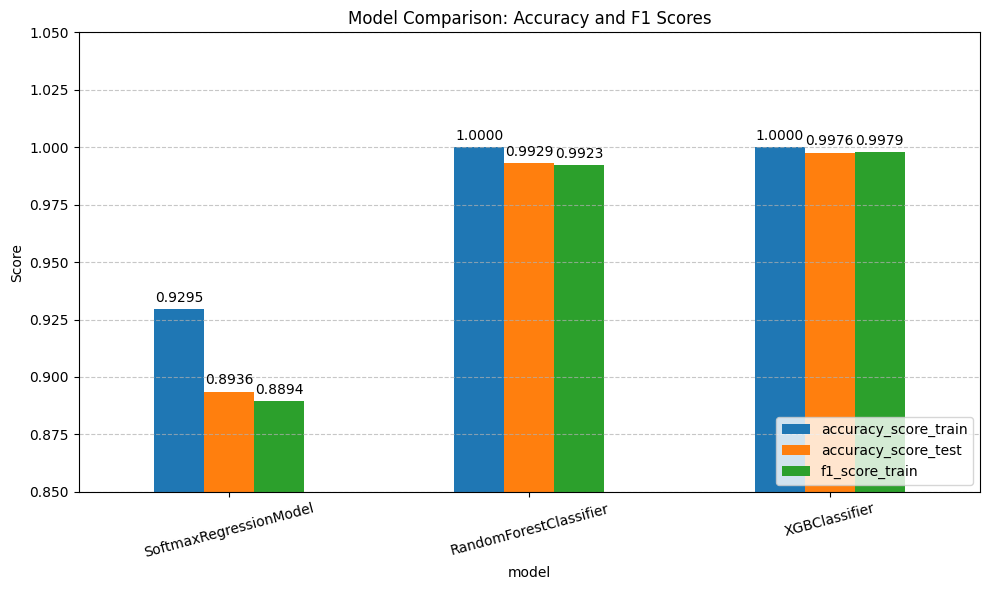

In [550]:
import pandas as pd
import matplotlib.pyplot as plt


# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_plot = df.set_index('model')[['accuracy_score_train', 'accuracy_score_test', 'f1_score_train']].plot(
    kind='bar',
    ax=ax
)

# Customize plot
plt.title('Model Comparison: Accuracy and F1 Scores')
plt.ylabel('Score')
plt.ylim(0.85, 1.05)
plt.xticks(rotation=15)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()

# Add values on top of each bar
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.4f', label_type='edge', padding=3)

# Show the plot
plt.show()
